# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
output_data_file_2 = "../output_data/cities_clean.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
plt.ioff() 

In [2]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [4]:
#assign list variables to build data table.
City = []
Lat = []
Lng = []
Max_Temp= []
Humidity= []
Cloudiness= []
Wind_Speed= []
Country = []
Date = []

In [5]:
cities

['hobart',
 'richards bay',
 'bredasdorp',
 'qaqortoq',
 'mount isa',
 'puerto maldonado',
 'chuy',
 'saleaula',
 'butaritari',
 'gurupa',
 'korla',
 'dikson',
 'mataura',
 'necochea',
 'port hedland',
 'tsihombe',
 'san patricio',
 'vaini',
 'new norfolk',
 'kruisfontein',
 'roma',
 'lompoc',
 'sovetskiy',
 'berlevag',
 'amderma',
 'belaya gora',
 'arraial do cabo',
 'atuona',
 'meulaboh',
 'nizhniy odes',
 'sumbe',
 'hermanus',
 'qaanaaq',
 'dickinson',
 'rikitea',
 'laguna',
 'bilibino',
 'ostrovnoy',
 'jerome',
 'kavaratti',
 'nanortalik',
 'taolanaro',
 'bluff',
 'codrington',
 'flinders',
 'belushya guba',
 'puerto ayora',
 'hami',
 'pevek',
 'guerrero negro',
 'hofn',
 'ushuaia',
 'busselton',
 'utiroa',
 'islamkot',
 'ajaccio',
 'mar del plata',
 'ponta delgada',
 'torres',
 'cap malheureux',
 'brejo',
 'pangnirtung',
 'punta arenas',
 'surt',
 'muswellbrook',
 'albany',
 'marcona',
 'nikolskoye',
 'barrow',
 'souillac',
 'lavrentiya',
 'port elizabeth',
 'kaitangata',
 'barent

In [6]:
#cities = ['new norfolk', 'barrow', 'barentsburg', 'staromaryevka', 'thompson', 'yumen', 'bathsheba',\
# 'ushuaia', 'yar-sale', 'nishihara', 'leningradskiy', 'iqaluit', 'severo-kurilsk']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
group_item_number = np.uint8(5)
i = np.uint8(0)
j = np.uint8(0)
item = np.uint16(0)
if len(cities)%group_item_number:
    group_number = int(len(cities) / group_item_number) + 1
else:
    group_number = len(cities) / group_item_number

for i in range(0, group_number):
    j=0
    while ((j < group_item_number) & (item < (len(cities)-1))):

        item = i * (group_item_number) + j
        city = cities[item]
        print(f'Processing record {item} of group {i} item {j} | {city}')
        try:
            response = requests.get(query_url + city).json()
            #City.append()
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Humidity.append(response['main']['humidity'])
            Cloudiness.append(response['clouds']['all'])
            Wind_Speed.append(response['wind']['speed'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
        except KeyError:
            print('Data for ',city,' not available.  Skipping......')
            Lat.append(np.nan)
            Lng.append(np.nan)
            Max_Temp.append(np.nan)
            Humidity.append(np.nan)
            Cloudiness.append(np.nan)
            Wind_Speed.append(np.nan)
            Country.append(np.nan)
            Date.append(np.nan)
        j = j + 1

Processing record 0 of group 0 item 0 | hobart
Processing record 1 of group 0 item 1 | richards bay
Processing record 2 of group 0 item 2 | bredasdorp
Processing record 3 of group 0 item 3 | qaqortoq
Processing record 4 of group 0 item 4 | mount isa
Processing record 5 of group 1 item 0 | puerto maldonado
Processing record 6 of group 1 item 1 | chuy
Processing record 7 of group 1 item 2 | saleaula
Data for  saleaula  not available.  Skipping......
Processing record 8 of group 1 item 3 | butaritari
Processing record 9 of group 1 item 4 | gurupa
Processing record 10 of group 2 item 0 | korla
Processing record 11 of group 2 item 1 | dikson
Processing record 12 of group 2 item 2 | mataura
Processing record 13 of group 2 item 3 | necochea
Processing record 14 of group 2 item 4 | port hedland
Processing record 15 of group 3 item 0 | tsihombe
Data for  tsihombe  not available.  Skipping......
Processing record 16 of group 3 item 1 | san patricio
Processing record 17 of group 3 item 2 | vaini


Processing record 148 of group 29 item 3 | port blair
Processing record 149 of group 29 item 4 | ahipara
Processing record 150 of group 30 item 0 | bathsheba
Processing record 151 of group 30 item 1 | isangel
Processing record 152 of group 30 item 2 | putai
Processing record 153 of group 30 item 3 | yumen
Processing record 154 of group 30 item 4 | cherskiy
Processing record 155 of group 31 item 0 | barcelos
Processing record 156 of group 31 item 1 | tuktoyaktuk
Processing record 157 of group 31 item 2 | hamilton
Processing record 158 of group 31 item 3 | ugoofaaru
Processing record 159 of group 31 item 4 | port alfred
Processing record 160 of group 32 item 0 | fort nelson
Processing record 161 of group 32 item 1 | touros
Processing record 162 of group 32 item 2 | salym
Processing record 163 of group 32 item 3 | cabo san lucas
Processing record 164 of group 32 item 4 | bubaque
Processing record 165 of group 33 item 0 | jamestown
Processing record 166 of group 33 item 1 | macklin
Process

Processing record 292 of group 58 item 2 | iqaluit
Processing record 293 of group 58 item 3 | luderitz
Processing record 294 of group 58 item 4 | castro
Processing record 295 of group 59 item 0 | yaan
Processing record 296 of group 59 item 1 | altay
Processing record 297 of group 59 item 2 | ayan
Processing record 298 of group 59 item 3 | alofi
Processing record 299 of group 59 item 4 | sinnamary
Processing record 300 of group 60 item 0 | merauke
Processing record 301 of group 60 item 1 | tygda
Processing record 302 of group 60 item 2 | shache
Processing record 303 of group 60 item 3 | garachine
Processing record 304 of group 60 item 4 | arkhara
Processing record 305 of group 61 item 0 | kahului
Processing record 306 of group 61 item 1 | kutum
Processing record 307 of group 61 item 2 | alyangula
Processing record 308 of group 61 item 3 | vanimo
Processing record 309 of group 61 item 4 | progreso
Processing record 310 of group 62 item 0 | frontera
Processing record 311 of group 62 item 

Data for  el faiyum  not available.  Skipping......
Processing record 437 of group 87 item 2 | boende
Processing record 438 of group 87 item 3 | albert
Processing record 439 of group 87 item 4 | hambantota
Processing record 440 of group 88 item 0 | katsina
Processing record 441 of group 88 item 1 | tsiroanomandidy
Processing record 442 of group 88 item 2 | awbari
Processing record 443 of group 88 item 3 | broken hill
Processing record 444 of group 88 item 4 | huarmey
Processing record 445 of group 89 item 0 | macherla
Processing record 446 of group 89 item 1 | vila velha
Processing record 447 of group 89 item 2 | calabozo
Processing record 448 of group 89 item 3 | milingimbi
Data for  milingimbi  not available.  Skipping......
Processing record 449 of group 89 item 4 | swan hill
Processing record 450 of group 90 item 0 | mason city
Processing record 451 of group 90 item 1 | saint-francois
Processing record 452 of group 90 item 2 | pangkalanbuun
Processing record 453 of group 90 item 3 

Processing record 588 of group 117 item 3 | lilongwe
Processing record 589 of group 117 item 4 | inverell
Processing record 590 of group 118 item 0 | waddan
Processing record 591 of group 118 item 1 | marawi
Processing record 592 of group 118 item 2 | ithaki
Processing record 593 of group 118 item 3 | antofagasta
Processing record 594 of group 118 item 4 | oktyabrskoye
Processing record 595 of group 119 item 0 | tabuk
Processing record 596 of group 119 item 1 | nizhneyansk
Data for  nizhneyansk  not available.  Skipping......
Processing record 597 of group 119 item 2 | ransang
Processing record 598 of group 119 item 3 | college
Processing record 599 of group 119 item 4 | cravo norte
Processing record 600 of group 120 item 0 | kamina
Processing record 601 of group 120 item 1 | kushiro
Processing record 602 of group 120 item 2 | jaisalmer
Processing record 603 of group 120 item 3 | vuktyl
Processing record 604 of group 120 item 4 | rockland
Processing record 605 of group 121 item 0 | buf

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
main_df = pd.DataFrame({'city' : cities, 'Latitude' : Lat, 'Longitude': Lng, "Max temp, F": Max_Temp, "Humidity %" : Humidity, \
            "Cloudiness" : Cloudiness, 'Wind Speed, mph' : Wind_Speed, 'Country' : Country , 'Date' : Date})
len(main_df)
main_df

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,hobart,-42.88,147.33,55.99,54.0,40.0,12.75,AU,1.592229e+09
1,richards bay,-28.78,32.04,68.68,52.0,0.0,9.86,ZA,1.592229e+09
2,bredasdorp,-34.53,20.04,62.60,63.0,30.0,10.09,ZA,1.592229e+09
3,qaqortoq,60.72,-46.03,42.80,56.0,75.0,9.17,GL,1.592229e+09
4,mount isa,-20.73,139.50,64.40,30.0,0.0,11.41,AU,1.592229e+09
...,...,...,...,...,...,...,...,...,...
609,saint cloud,45.56,-94.16,66.00,48.0,75.0,14.99,US,1.592229e+09
610,labrea,-7.26,-64.80,78.08,84.0,89.0,3.31,BR,1.592229e+09
611,ullapool,57.90,-5.16,70.00,71.0,99.0,8.99,GB,1.592229e+09
612,grimshaw,56.18,-117.60,50.00,93.0,90.0,9.17,CA,1.592229e+09


In [9]:
main_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#there are no cities with humidity over 100%
main_df.loc[(main_df['Humidity %'] > 100)][:]

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = main_df.loc[(main_df['Humidity %'] > 100)].index
humidity_index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = main_df.drop(index = humidity_index)
clean_city_data

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,hobart,-42.88,147.33,55.99,54.0,40.0,12.75,AU,1.592229e+09
1,richards bay,-28.78,32.04,68.68,52.0,0.0,9.86,ZA,1.592229e+09
2,bredasdorp,-34.53,20.04,62.60,63.0,30.0,10.09,ZA,1.592229e+09
3,qaqortoq,60.72,-46.03,42.80,56.0,75.0,9.17,GL,1.592229e+09
4,mount isa,-20.73,139.50,64.40,30.0,0.0,11.41,AU,1.592229e+09
...,...,...,...,...,...,...,...,...,...
609,saint cloud,45.56,-94.16,66.00,48.0,75.0,14.99,US,1.592229e+09
610,labrea,-7.26,-64.80,78.08,84.0,89.0,3.31,BR,1.592229e+09
611,ullapool,57.90,-5.16,70.00,71.0,99.0,8.99,GB,1.592229e+09
612,grimshaw,56.18,-117.60,50.00,93.0,90.0,9.17,CA,1.592229e+09


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file_2)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

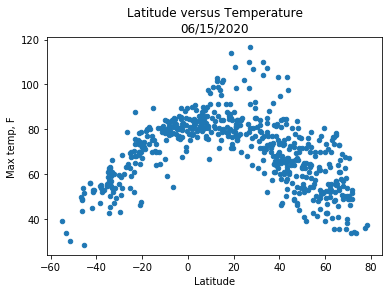

In [14]:
now = datetime.now()
date = now.strftime("%m/%d/%Y")
temperature_title = "Latitude versus Temperature\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Max temp, F', kind='scatter', title = temperature_title)

## Latitude vs. Humidity Plot

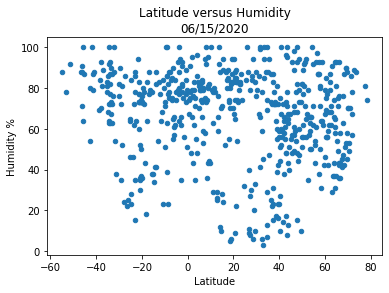

In [15]:
humidity_title = "Latitude versus Humidity\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Humidity %', kind='scatter', title = humidity_title)

## Latitude vs. Cloudiness Plot

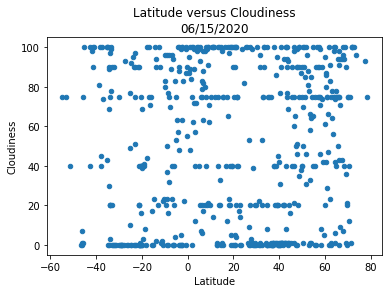

In [16]:
cloudiness_title = "Latitude versus Cloudiness\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Cloudiness', kind='scatter', title = cloudiness_title)

## Latitude vs. Wind Speed Plot

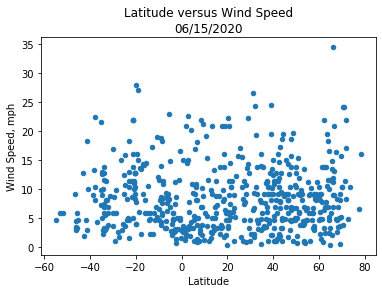

In [17]:
wind_speed_title = "Latitude versus Wind Speed\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Wind Speed, mph', kind='scatter', title = wind_speed_title)

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values, graph_title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    plt.scatter(x = x_values, y = y_values)
    return

In [68]:
# Create Northern and Southern Hemisphere DataFrames
#I created a dataframe of dataframes.  One is 'north' and the other 'south'
city_north_df = clean_city_data.loc[clean_city_data['Latitude'] > 0][:]
city_south_df = clean_city_data.loc[clean_city_data['Latitude'] < 0][:]
city_north_df.head()
city_south_df.head()
data_df = {'North' : city_north_df, 'South' : city_south_df}

In [95]:
hemisphere_list = ['North', 'South']
y_axis_data_list = ['Max temp, F', 'Humidity %', 'Cloudiness', 'Wind Speed, mph']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#this function simply takes in the slope, intercept and max and min latitudes
#it returns the corresponding y_values for plotting
def y_values(slope, intercept, x_max, x_min):
    y_max = slope * x_max + intercept
    y_min = slope * x_min + intercept
    return (y_max, y_min)

<class 'tuple'>
48.62997300786651


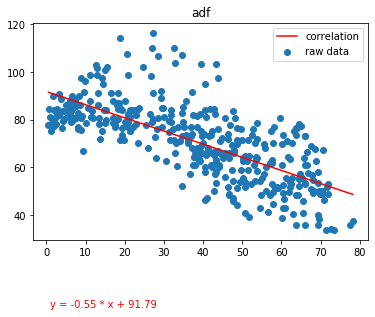

In [71]:
plt.scatter(x = data_df['North']['Latitude'], y = data_df['North']['Max temp, F'])
plt.title('adf')
slope, intercept, r_value, p_value, std_err = linregress(x = data_df['North']['Latitude'], y = data_df['North']['Max temp, F'])
x_max = data_df['North']['Latitude'].max()
x_min = data_df['North']['Latitude'].min()
y_max, y_min = y_values(slope, intercept, x_max, x_min)
print(type(y_values(slope, intercept, x_max, x_min)))
x_line = [x_max, x_min]
y_line = [y_max, y_min]
print(y_max)
plt.plot(x_line, y_line, color = 'red')
text_equation = 'y = {:.2f} * x + {:.2f}'.format(slope, intercept)
plt.text(1, 1,text_equation, color = 'r')
plt.legend(['correlation', 'raw data'] , loc = 'best')

#### Generate all graphs

In [102]:
def graph_function(hemisphere, y_axis_data):
    plt.figure()
    plt.scatter(x = data_df[hemisphere]['Latitude'], y = data_df[hemisphere][y_axis_data])
    plt.title('{}ern Hemisphere - {} vs. Latitude\n Linear Regression'.format(hemisphere, y_axis_data))
    slope, intercept, r_value, p_value, std_err = linregress(x = data_df[hemisphere]['Latitude'], y = data_df[hemisphere][y_axis_data])
    r_squared = r_value ** 2
    x_max = data_df[hemisphere]['Latitude'].max()
    x_min = data_df[hemisphere]['Latitude'].min()
    y_max, y_min = y_values(slope, intercept, x_max, x_min)
    x_line = [x_max, x_min]
    y_line = [y_max, y_min]
    print(y_max)
    plt.plot(x_line, y_line, color = 'red')
    text_equation = 'y = {:.2f} * x + {:.2f}\nr**2 = {:.4f}'.format(slope, intercept, r_squared)
    plt.text(x_min, y_max,text_equation, color = 'r', bbox=dict(facecolor='w', alpha=0.5))
    plt.legend(['correlation', 'raw data'] , bbox_to_anchor=(1.05, 1), loc = 'upper left')
    #this line is key to making the graphs plot one after another
    plt.show()


y_axis_data_list Max temp, F
48.62997300786651


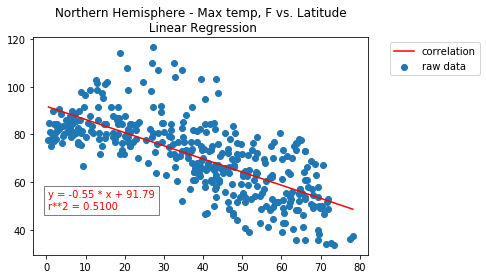

y_axis_data_list Humidity %
60.9278046507061


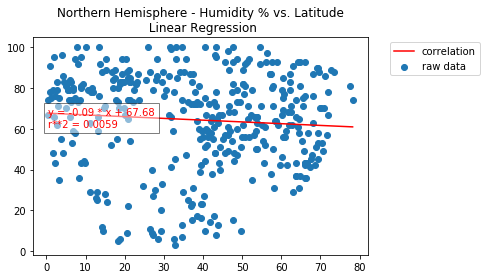

y_axis_data_list Cloudiness
52.562226340528134


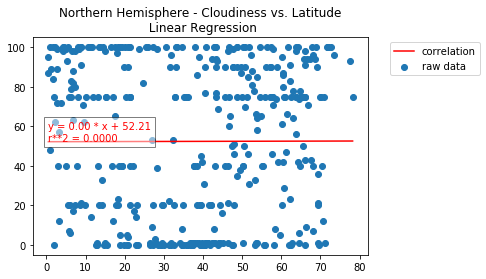

y_axis_data_list Wind Speed, mph
9.167525852253117


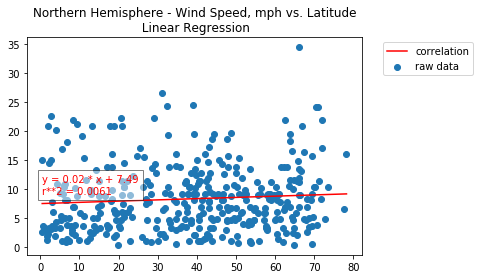

y_axis_data_list Max temp, F
85.17850041126908


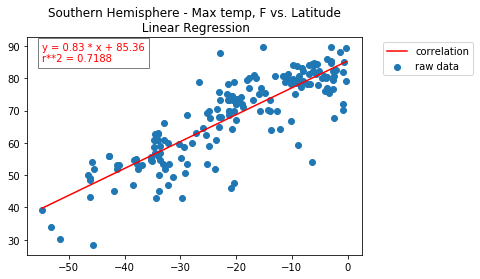

y_axis_data_list Humidity %
67.8647184161538


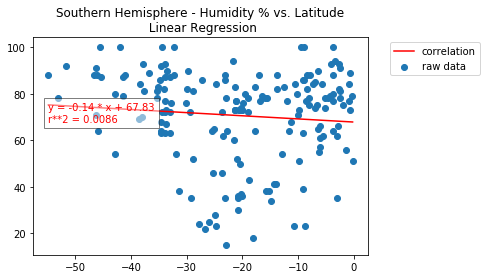

y_axis_data_list Cloudiness
46.13433119758313


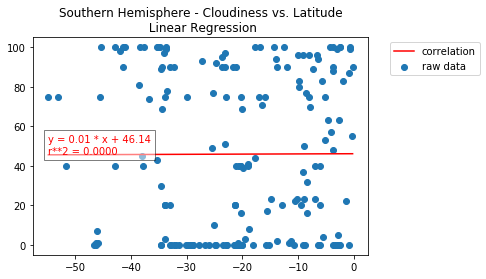

y_axis_data_list Wind Speed, mph
8.294203209948103


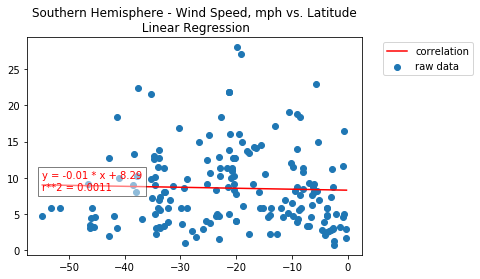

In [103]:
for hemisphere in hemisphere_list:
    for y_axis_data in y_axis_data_list:
        print('y_axis_data_list', y_axis_data)
        graph_function(hemisphere, y_axis_data)



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression